## **Used Car Price Prediction - EDA**

### **Introduction**

In this EDA, I will explore the data more in-depth, check the correlations of columns with our target variable "price"
merge datasets, make visualizations to better understand the data. We have different datasets and based on the domain understanding, these datasets contains some of the features that could effect the used car price. 

### **Attribute Information**

Acronym | Description
---|---
Model | Name of the car's model
Year | Model year of the car
Price | Price of the car in £
Transmission | The transmission allows the vehicle to change gears, thereby transferring power from the engine to the drive axle in the most efficient way possible.
Mile Age | A number of miles travelled or covered 
Fuel Type | The type of fuel the vehicle uses
Tax | is a tax which has to be paid on, or included with, a wheeled vehicle to use it on a public road.
Mpg | Mpg stands for miles per gallon, and is used to show how far your car is able to travel for every gallon (or 4.55 litres)
Engine Size| Measurement of the total volume of the cylinders in the engine

### **Import Libraries**

In [637]:
#Data Processing
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pyl

# To visualize missing value
import missingno as msno 

#Set-up Visualization settings
%matplotlib inline 

### **1. Read Data**

I will be using different datasets from different brands such as Mercedes-Benz, Ford, Audi, Volkswagen, Toyota, Vauxhall and BMW. Furthermore, the datasets has same attributes/features such as mileage, fuel type, transsmissions, year, model, and price.

In [638]:
df_audi = pd.read_csv("cars/audi.csv",skipinitialspace=True)
df_vw = pd.read_csv("cars/vw.csv",skipinitialspace=True)
df_bmw = pd.read_csv("cars/bmw.csv",skipinitialspace=True)
df_merc = pd.read_csv("cars/merc.csv",skipinitialspace=True)
df_toyota = pd.read_csv("cars/toyota.csv",skipinitialspace=True)
df_vauxhall = pd.read_csv("cars/vauxhall.csv",skipinitialspace=True)
df_ford = pd.read_csv("cars/ford.csv",skipinitialspace=True)
df_skoda = pd.read_csv("cars/skoda.csv",skipinitialspace=True)

Lets check the shape of the datasets

In [639]:
print("Audi dataset has {} rows and {} columns".format(df_audi.shape[0],df_audi.shape[1]))
print("Volkswagen dataset has {} rows and {} columns".format(df_vw.shape[0],df_vw.shape[1]))
print("BMW dataset has {} rows and {} columns".format(df_bmw.shape[0],df_bmw.shape[1]))
print("Mercedes-Benz dataset has {} rows and {} columns".format(df_merc.shape[0],df_merc.shape[1]))
print("Toyota dataset has {} rows and {} columns".format(df_toyota.shape[0],df_toyota.shape[1]))
print("Vauxhall dataset has {} rows and {} columns".format(df_vauxhall.shape[0],df_vauxhall.shape[1]))
print("Ford dataset has {} rows and {} columns".format(df_ford.shape[0],df_ford.shape[1]))
print("Skoda dataset has {} rows and {} columns".format(df_skoda.shape[0],df_skoda.shape[1]))

Audi dataset has 10668 rows and 9 columns
Volkswagen dataset has 15157 rows and 9 columns
BMW dataset has 10781 rows and 9 columns
Mercedes-Benz dataset has 13119 rows and 9 columns
Toyota dataset has 6738 rows and 9 columns
Vauxhall dataset has 13632 rows and 9 columns
Ford dataset has 17965 rows and 9 columns
Skoda dataset has 6267 rows and 9 columns


It can be seen from the shapes that we have 9 columns in each datasets.

In [640]:
print("Audi dataset columns {}".format(df_audi.columns))
print("Volkswagen dataset columns {} ".format(df_vw.columns))
print("BMW dataset columns {} ".format(df_bmw.columns))
print("Mercedes-Benz dataset columns {} ".format(df_merc.columns))
print("Toyota dataset columns {} ".format(df_toyota.columns))
print("Vauxhall dataset columns {} ".format(df_vauxhall.columns))
print("Ford dataset columns {} ".format(df_ford.columns))
print("Skoda dataset columns {} ".format(df_skoda.columns))

Audi dataset columns Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Volkswagen dataset columns Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object') 
BMW dataset columns Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object') 
Mercedes-Benz dataset columns Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object') 
Toyota dataset columns Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object') 
Vauxhall dataset columns Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object') 
Ford dataset columns Index(['model', 'year', 'price', 'transmission',

### **2. Merge Datasets**

As I mention in the domain understanding in the proposal document, Brands have an impact on the used car prices. Moreover, it will create diversity in the data. Therefore I will be using different brand datasets to predict the used car prices. Before merging datasets, we have to create a new column for identifying the different brands.

In [641]:
df_audi.insert(0,"brand","Audi")
df_vw.insert(0,"brand","Volkswagen")
df_bmw.insert(0,"brand","BMW")
df_merc.insert(0,"brand","Mercedes-Benz")
df_toyota.insert(0,"brand","Toyota")
df_vauxhall.insert(0,"brand","Vauxhall")
df_ford.insert(0,"brand","Ford")
df_skoda.insert(0,"brand","Skoda")

I will be using concat method from pandas. Concat method is simply stacks multiple DataFrame together either vertically, or stitches horizontally after aligning on index. The concat method joins DataFrames together when columns match.

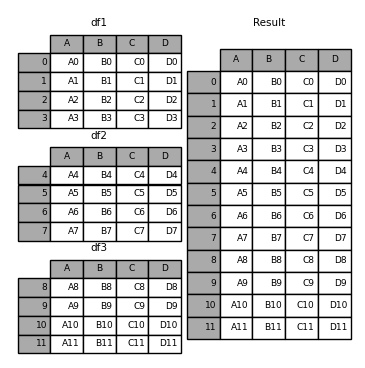

Image also shows how concat works

In [642]:
df = pd.concat([df_audi, df_vw,df_bmw,df_merc,df_toyota,df_vauxhall,df_ford,df_skoda]).reset_index(drop=True)
df_copy = df.copy()
df.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735.0,Petrol,150.0,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203.0,Diesel,20.0,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946.0,Petrol,30.0,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952.0,Diesel,145.0,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998.0,Petrol,145.0,49.6,1.0


In [643]:
df.tail()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94322,Skoda,Yeti,2014,11440,Semi-Auto,14569.0,Petrol,160.0,44.8,1.2
94323,Skoda,Octavia,2014,10990,Semi-Auto,49999.0,Petrol,30.0,56.5,1.4
94324,Skoda,Fabia,2017,9500,Semi-Auto,17131.0,Petrol,145.0,61.4,1.0
94325,Skoda,Citigo,2016,5999,Manual,21747.0,Petrol,20.0,62.8,1.0
94326,Skoda,Fabia,2017,9232,Semi-Auto,42530.0,Petrol,20.0,60.1,1.2


In [644]:
df.shape

(94327, 10)

We can see that our new dataframe has 94327 rows and 10 columns

In [645]:
df.nunique()

brand               8
model             179
year               27
price           12995
transmission        4
mileage         41155
fuelType            5
tax                48
mpg               204
engineSize         40
dtype: int64

### **3. Cleaning**

In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94327 entries, 0 to 94326
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         94327 non-null  object 
 1   model         94327 non-null  object 
 2   year          94327 non-null  int64  
 3   price         94327 non-null  int64  
 4   transmission  94327 non-null  object 
 5   mileage       94143 non-null  float64
 6   fuelType      94327 non-null  object 
 7   tax           93312 non-null  float64
 8   mpg           94179 non-null  float64
 9   engineSize    94164 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 7.2+ MB


Using info method we can see the datatypes, column names, number of non-null values of the dataframe.

In [647]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,94327.000000,94327.000000,94143.000000,93312.000000,94179.000000,94164.000000
mean,2017.086698,17014.284150,23165.049478,119.846965,55.229019,1.674215
std,2.133897,9981.390386,21318.336782,63.512592,16.300711,0.562897
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10199.000000,7386.000000,125.000000,47.100000,1.300000
50%,2017.000000,14599.000000,17500.000000,145.000000,54.300000,1.600000
75%,2019.000000,20998.000000,32490.500000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


Describe will give us some statistics about the data such as max, min std and mean.
- From the first look, we can see that there is problem with engine size. If you look at the min engine size value which is 0. Therefore, I think this is wrong. Lets look at the rows which have the engine size 0. 
- If you look at again you will see that there is a car from year 2060 which is very weird.
- The tax rate of 0 also seems wrong

In [648]:
wrong_values = df[df["engineSize"] == 0]
wrong_values

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7505,Audi,Q5,2019,44790,Automatic,5886.0,Petrol,135.0,117.7,0.0
7506,Audi,Q3,2019,32788,Automatic,1500.0,Diesel,145.0,47.1,0.0
7516,Audi,Q3,2020,29944,Manual,1500.0,Petrol,145.0,40.9,0.0
7517,Audi,Q3,2020,33333,Automatic,1500.0,Diesel,145.0,47.1,0.0
7518,Audi,Q3,2020,29944,Automatic,1500.0,Petrol,145.0,32.5,0.0
...,...,...,...,...,...,...,...,...,...,...
93248,Skoda,Octavia,2017,16000,Automatic,16166.0,Diesel,145.0,61.4,0.0
93336,Skoda,Octavia,2017,10700,Manual,38552.0,Petrol,150.0,55.4,0.0
93394,Skoda,Fabia,2014,7500,Automatic,26008.0,Petrol,125.0,53.3,0.0
93433,Skoda,Fabia,2018,11500,Manual,10720.0,Petrol,150.0,64.2,0.0


Diesel and Petrol engine size can't be 0

In [649]:
wrong_years = df[df["year"]== 2060]
wrong_years

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
87821,Ford,Fiesta,2060,6495,Automatic,54807.0,Petrol,205.0,42.8,1.4


There is no car that is manufactured in 2060 yet

In [650]:
wrong_tax = df[df["tax"] < 10]
wrong_tax

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
30,Audi,A1,2015,9500,Automatic,54754.0,Diesel,0.0,76.3,1.6
50,Audi,A4,2016,12750,Manual,52561.0,Diesel,0.0,74.3,2.0
58,Audi,A3,2016,10200,Manual,66369.0,Diesel,0.0,83.1,1.6
60,Audi,A1,2013,7000,Manual,76269.0,Diesel,0.0,74.3,1.6
69,Audi,A1,2016,10800,Manual,18181.0,Petrol,0.0,67.3,1.0
...,...,...,...,...,...,...,...,...,...,...
94114,Skoda,Octavia,2017,8800,Manual,51233.0,Diesel,0.0,74.3,1.6
94147,Skoda,Octavia,2013,4980,Manual,144300.0,Diesel,0.0,74.3,1.6
94153,Skoda,Octavia,2015,5980,Manual,175500.0,Diesel,0.0,74.3,1.6
94201,Skoda,Citigo,2013,4699,Manual,46800.0,Petrol,0.0,68.9,1.0


Zero tax for petrol and deisel engine wrong.

It can be seen that, actually the values are wrong. Lets replace these values with NaN.

In [651]:
df["engineSize"] = df["engineSize"].replace(0, np.nan) 
df["year"] = df["year"].replace(2060, np.nan)
df["tax"] = df["tax"].replace(0, np.nan) 

Let's check the null values of the dataset.

In [652]:
df.isnull().sum()

brand              0
model              0
year               1
price              0
transmission       0
mileage          184
fuelType           0
tax             7172
mpg              148
engineSize       389
dtype: int64

We can also use the missingno library for seeing null values more visually.

<AxesSubplot:>

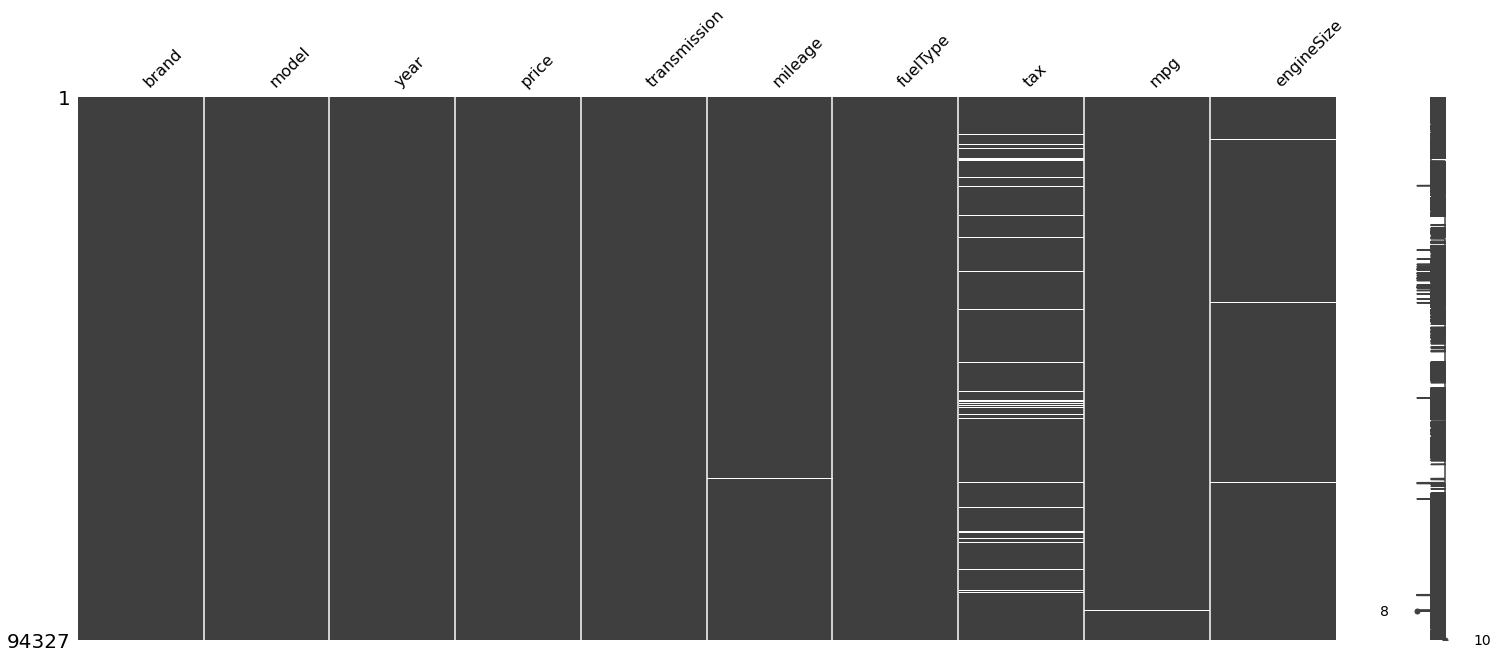

In [653]:
msno.matrix(df)

Moreover, a different visualization can be use to see the null values of columns

<AxesSubplot:>

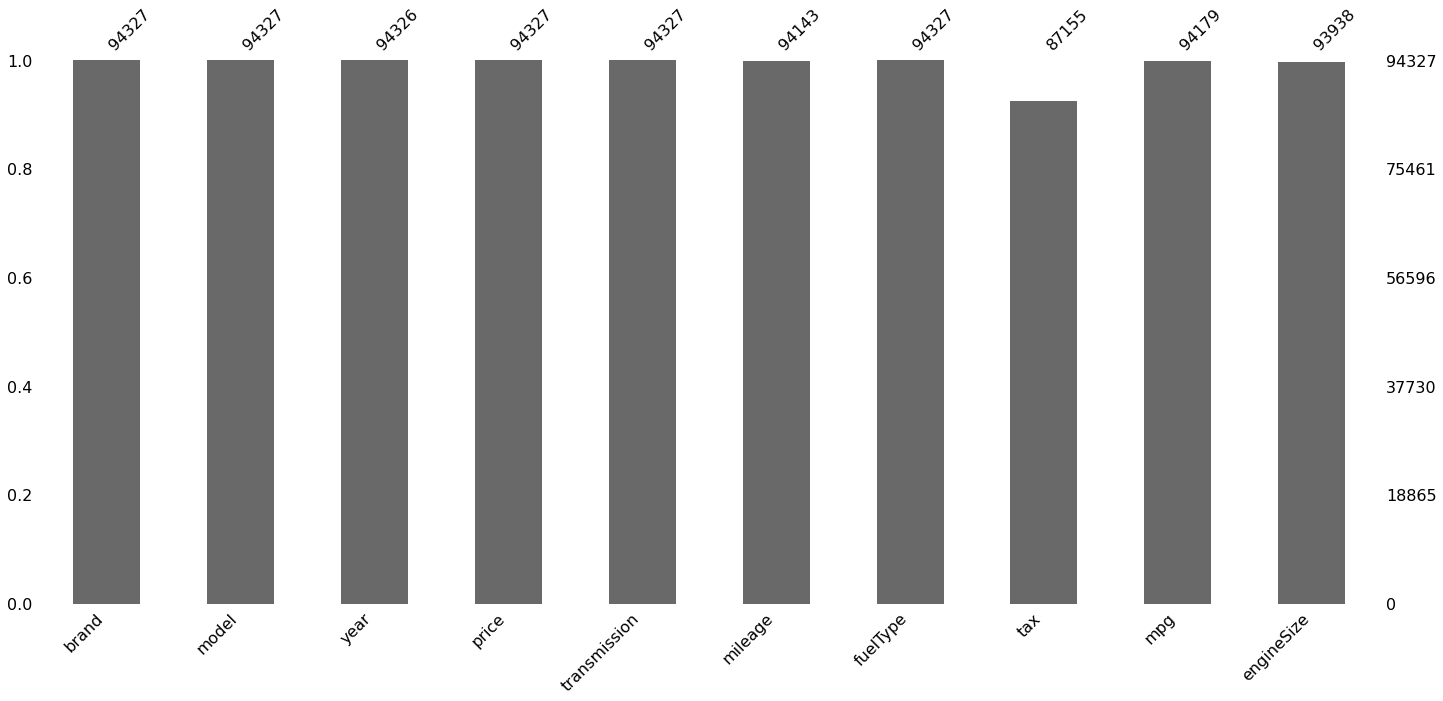

In [654]:
msno.bar(df)

This heatmap shows correlations of missing values between columns.

<AxesSubplot:>

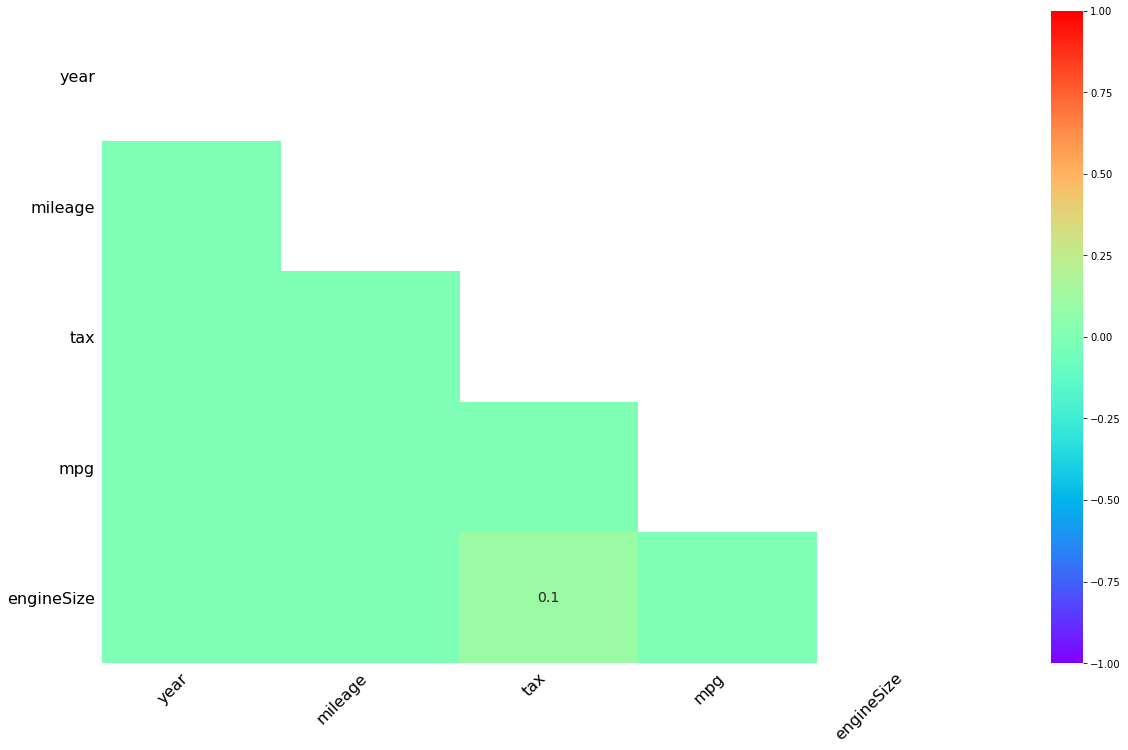

In [655]:
msno.heatmap(df,cmap='rainbow')

The heatmap shows no score which also suggests complete randomness MCAR. There is a weak correlation of missingness between engine size and tax. However, it is weak. It could be MCAR or MAR. Overall Missing values are missing independently from all the features. This means there is no systematic difference between the missing and available data. Therefore, It is MCAR. There are several methods that can applied when dealing missing values when missingness is MCAR such as model-based Imputation, mean/median/mode Imputation and proper multiple stochastic regression.

#### **How to deal with missing values**

It can be seen from the figure below that there are several ways to deal with missing values. We already identified the reason for the missingness of the data.

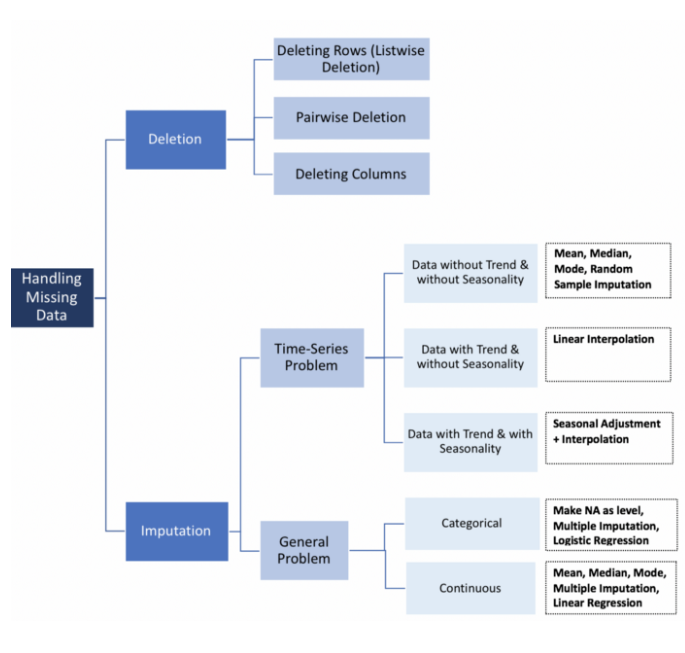

I want to prevent applying the deletion methods. Mainly because I want to keep the data. In addition, for example, Listwise deletion method produces biased parameters and estimates. If we follow the path, we will end up with methods such as Linear Regression, Multiple Imputation and Mean, Median, Mode imputation. There advantages and disadvantages of these methods:

- Imputation Using (Mean/Median) Values: This method is very easy to use and it is fast. It is also works good with numerical datasets. However, it will give poor results on encoded categorical features and doesn’t factor the correlations between features. It only works on the column level.

- Imputation Using (Most Frequent) or (Zero/Constant) Values: It is works good with categorical features. However, It also doesn’t factor the correlations between features and might create bias in our data.

- Multiple Imputation:  It aims to allow for the uncertainty about the missing data by creating several different plausible imputed data sets and appropriately combining results obtained from each of them. It is easy to use and and produces no biases (if imputation model is correct)

By looking at advantages and disadvantages as well as the missingness that we observed which is MCAR. Therefore, it is fair to assume that the missing values are most likely very close to the value of the mean or the median of the distribution, as these represent the most frequent/average observation. Consequently, I will apply the Mean,Median and mode imputation to deal with missing data. In addition, if we dont satisfy with the results after the prediction phase, we can always come back to and change imputation method to get more accurate results.



In [656]:
df.isnull().mean()*100

brand           0.000000
model           0.000000
year            0.001060
price           0.000000
transmission    0.000000
mileage         0.195066
fuelType        0.000000
tax             7.603337
mpg             0.156901
engineSize      0.412395
dtype: float64

The missing values is very few in mileage, mpg and engineSize.

Lets check the distribution of the missing data to determine which method we are going to use for filling missing values.

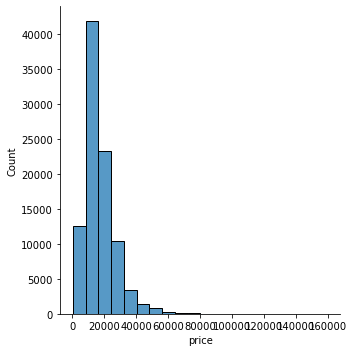

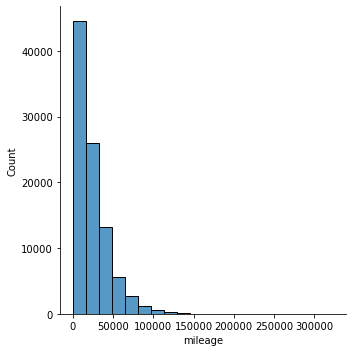

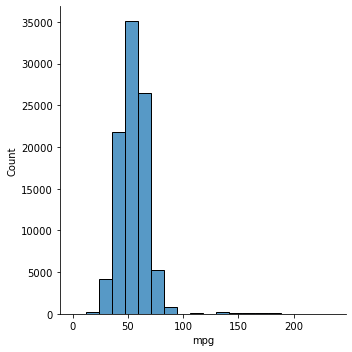

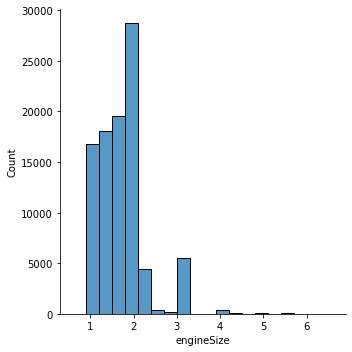

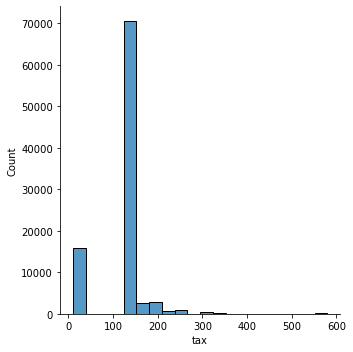

In [692]:
sns.displot(df, x="price", bins=20)
sns.displot(df, x="mileage", bins=20)
sns.displot(df, x="mpg", bins=20)
sns.displot(df, x="engineSize", bins=20)
sns.displot(df, x="tax", bins=20)

In a symmetric distribution, the mean locates the center accurately. On the other hand, in a skewed distribution, the mean can miss the mark. This problem occurs because outliers have a huge impact on the mean. Extreme values in an extended tail pull the mean away from the center. As the distribution becomes more skewed, the mean is drawn further away from the center. Consequently, it’s best to use the mean as a measure of the central tendency when you have a symmetric distribution.

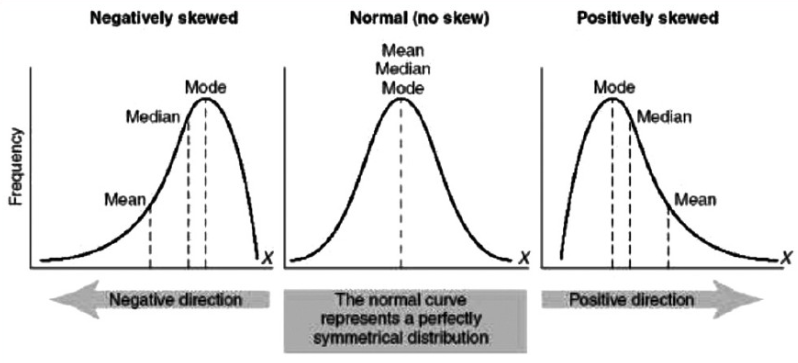

- Mile age is continuous and it look like a skewed distribution, therefore, It is good to use median.
- Mpg is continuous and it look like a skewed distribution, therefore, It is good to use median.
- Engine size is continuous and it look like a skewed distribution, It is good to use median.
- Tax is continuous and it look like a bit skewed distribution, It is good to use median.

In [658]:
df['mileage'] = df.mileage.fillna(df.mileage.median())
df['mpg'] = df.mpg.fillna(df.mpg.median())
df['engineSize'] = df.engineSize.fillna(df.engineSize.median())
df['tax'] = df.tax.fillna(df.tax.median())
df['year'] = df.year.fillna(df.year.median())

In [659]:
df.isnull().sum()

brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

It can bee seen that we filled all the missing values

### **4. Outliers**

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling can be improved by understanding and even removing these outlier values.

- Q3 is the median of the upper half of the data
- Q1 is the median of the lower half of the data
- IQR is the difference between Q3-Q1
- Outliers can be found as [Q1-1.5IQR,Q3+1.5IQR]

In [693]:
# define continuous variable & plot
continous_features = ['year','mpg','price','engineSize','mileage','tax']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, Number of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
            
outliers(df[continous_features])


For the feature year, Number of Outliers is 1662
For the feature mpg, Number of Outliers is 932
For the feature price, Number of Outliers is 3662
For the feature engineSize, Number of Outliers is 677
For the feature mileage, Number of Outliers is 3693
For the feature tax, Number of Outliers is 30143


The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. By just using this technique, we can see the number of outliers we have. However, we still need to investigate separately them in order to make sure of it.

We can also plot a boxplot to see the outliers

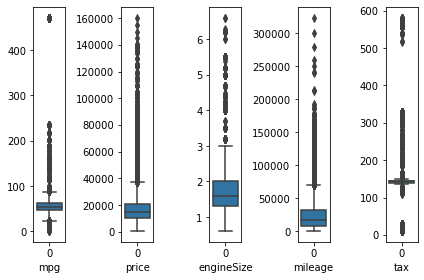

In [661]:
ig, axes = plt.subplots(1,5)
count = 0
for each_feature in continous_features[1:]:
    feature_data = df[each_feature]
    ax = sns.boxplot(data = feature_data, orient='v', ax=axes[count])
    ax.set(xlabel='{}'.format(each_feature))
    count+=1

plt.tight_layout()

#### **4.1 Investigation on outliers**

In terms of statistics, If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

##### **4.1.1 Year**

In [662]:
print(df['year'].skew())

-2.00289697673228


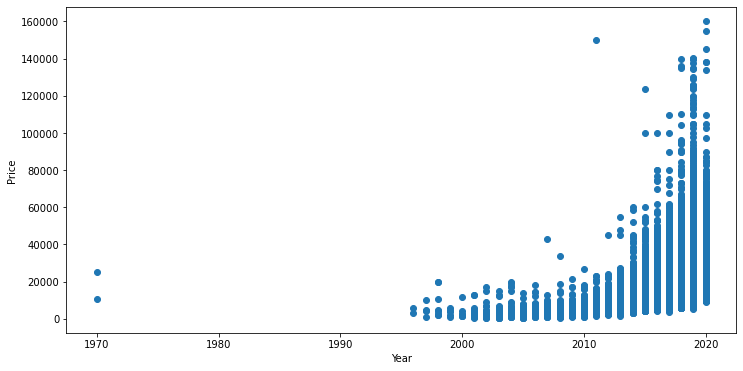

In [663]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['year'], df['price'])
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

In [664]:
outliers_of_year = df[df['year'] < 1980]
outliers_of_year

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
48678,Mercedes-Benz,M Class,1970.0,24999,Automatic,14000.0,Diesel,305.0,39.2,1.6
67300,Vauxhall,Zafira,1970.0,10495,Manual,37357.0,Petrol,200.0,42.2,1.4


It doesn;t look like these records are a measurement error or data entry error. I will keep them.

In [683]:
outliers_of_year2 = df[df['price'] > 120000]
outliers_of_year2

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1646,Audi,R8,2019.0,129000,Semi-Auto,4000.0,Petrol,145.0,21.4,5.2
2255,Audi,R8,2020.0,137995,Semi-Auto,70.0,Petrol,145.0,21.1,5.2
3359,Audi,R8,2019.0,125000,Automatic,100.0,Petrol,145.0,24.1,5.2
3367,Audi,R8,2019.0,135000,Automatic,1000.0,Petrol,145.0,32.8,5.2
4179,Audi,R8,2019.0,137500,Semi-Auto,10.0,Petrol,150.0,21.4,5.2
4783,Audi,R8,2020.0,145000,Semi-Auto,2000.0,Petrol,145.0,21.1,5.2
4925,Audi,R8,2019.0,125000,Semi-Auto,500.0,Petrol,145.0,21.4,5.2
5459,Audi,R8,2020.0,133900,Semi-Auto,333.0,Petrol,145.0,21.4,5.2
10468,Audi,R8,2019.0,125000,Automatic,13663.0,Petrol,150.0,21.4,5.2
29463,BMW,2 Series,2015.0,123456,Semi-Auto,33419.0,Diesel,20.0,68.9,2.0


Again if we check the prices that are too high, we can see that these are luxury cars. Furthermore, most of them are new.

##### **4.1.2 Engine Size**

In [665]:
print(df['engineSize'].skew())

1.403180309217224


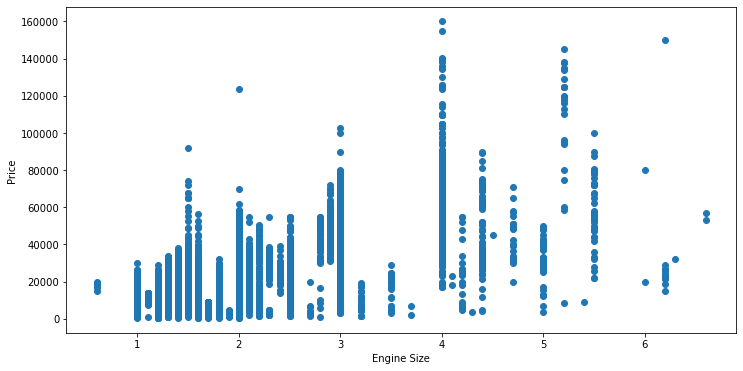

In [666]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['engineSize'], df['price'])
ax.set_xlabel('Engine Size')
ax.set_ylabel('Price')
plt.show()

In [667]:
outliers_of_enginesize = df[df['engineSize'] > 6]
outliers_of_enginesize

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10455,Audi,A8,2015.0,32000,Automatic,30306.0,Petrol,570.0,25.0,6.3
35410,BMW,7 Series,2017.0,52950,Automatic,22000.0,Petrol,150.0,22.1,6.6
35624,BMW,7 Series,2017.0,57000,Automatic,11297.0,Petrol,145.0,22.1,6.6
36611,Mercedes-Benz,SL CLASS,2011.0,149948,Automatic,3000.0,Petrol,570.0,21.4,6.2
36832,Mercedes-Benz,C Class,2014.0,26998,Semi-Auto,24175.0,Petrol,570.0,23.5,6.2
37220,Mercedes-Benz,C Class,2014.0,28990,Semi-Auto,19562.0,Petrol,570.0,23.5,6.2
37505,Mercedes-Benz,C Class,2014.0,25885,Semi-Auto,37000.0,Petrol,570.0,23.5,6.2
39886,Mercedes-Benz,C Class,2013.0,23000,Semi-Auto,43442.0,Petrol,580.0,23.0,6.2
46146,Mercedes-Benz,C Class,2013.0,22995,Semi-Auto,49964.0,Petrol,570.0,23.0,6.2
46299,Mercedes-Benz,C Class,2013.0,23990,Automatic,44000.0,Petrol,570.0,23.5,6.2


We can see that these are high-end cars which are expensive. They are also performance cars. Therefore the engine size values are correct.

In [668]:
outliers_of_enginesize2 = df[df['engineSize'] < 1 ]
outliers_of_enginesize2

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
25857,BMW,i3,2016.0,17100,Automatic,25269.0,Other,145.0,470.8,0.6
34013,BMW,i3,2015.0,14940,Automatic,59000.0,Other,145.0,470.8,0.6
34445,BMW,i3,2017.0,19300,Automatic,32867.0,Other,145.0,470.8,0.6
35905,BMW,i3,2017.0,20000,Automatic,19178.0,Other,145.0,470.8,0.6
35911,BMW,i3,2017.0,19500,Automatic,23956.0,Other,135.0,470.8,0.6
36150,BMW,i3,2016.0,17000,Automatic,41063.0,Other,145.0,470.8,0.6
36355,BMW,i3,2017.0,17600,Automatic,50867.0,Other,135.0,470.8,0.6


BMW i3 has  647 cc engine which is same as the data.

##### **4.1.3 Mileage**

In [669]:
print(df['mileage'].skew())

1.7940883400222978


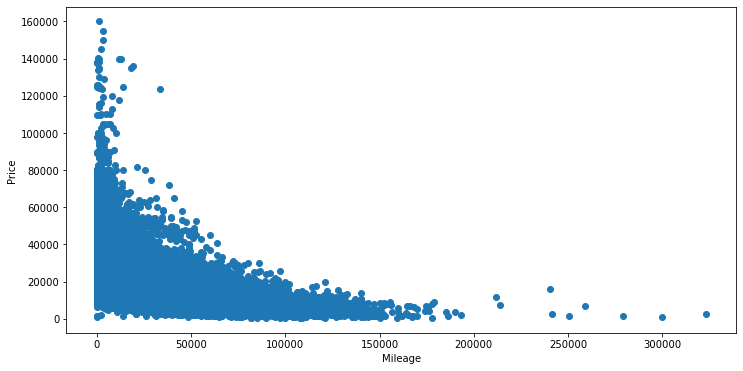

In [670]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['mileage'], df['price'])
ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
plt.show()

In [685]:
outliers_of_mileage = df[df['price'] > 120000]
outliers_of_mileage

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1646,Audi,R8,2019.0,129000,Semi-Auto,4000.0,Petrol,145.0,21.4,5.2
2255,Audi,R8,2020.0,137995,Semi-Auto,70.0,Petrol,145.0,21.1,5.2
3359,Audi,R8,2019.0,125000,Automatic,100.0,Petrol,145.0,24.1,5.2
3367,Audi,R8,2019.0,135000,Automatic,1000.0,Petrol,145.0,32.8,5.2
4179,Audi,R8,2019.0,137500,Semi-Auto,10.0,Petrol,150.0,21.4,5.2
4783,Audi,R8,2020.0,145000,Semi-Auto,2000.0,Petrol,145.0,21.1,5.2
4925,Audi,R8,2019.0,125000,Semi-Auto,500.0,Petrol,145.0,21.4,5.2
5459,Audi,R8,2020.0,133900,Semi-Auto,333.0,Petrol,145.0,21.4,5.2
10468,Audi,R8,2019.0,125000,Automatic,13663.0,Petrol,150.0,21.4,5.2
29463,BMW,2 Series,2015.0,123456,Semi-Auto,33419.0,Diesel,20.0,68.9,2.0


We can't say these are outliers because it is makes sense that these cars can have high mileage because they are quite old.

In [684]:
outliers_of_mileage2 = df[df['price'] > 120000]
outliers_of_mileage2

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1646,Audi,R8,2019.0,129000,Semi-Auto,4000.0,Petrol,145.0,21.4,5.2
2255,Audi,R8,2020.0,137995,Semi-Auto,70.0,Petrol,145.0,21.1,5.2
3359,Audi,R8,2019.0,125000,Automatic,100.0,Petrol,145.0,24.1,5.2
3367,Audi,R8,2019.0,135000,Automatic,1000.0,Petrol,145.0,32.8,5.2
4179,Audi,R8,2019.0,137500,Semi-Auto,10.0,Petrol,150.0,21.4,5.2
4783,Audi,R8,2020.0,145000,Semi-Auto,2000.0,Petrol,145.0,21.1,5.2
4925,Audi,R8,2019.0,125000,Semi-Auto,500.0,Petrol,145.0,21.4,5.2
5459,Audi,R8,2020.0,133900,Semi-Auto,333.0,Petrol,145.0,21.4,5.2
10468,Audi,R8,2019.0,125000,Automatic,13663.0,Petrol,150.0,21.4,5.2
29463,BMW,2 Series,2015.0,123456,Semi-Auto,33419.0,Diesel,20.0,68.9,2.0


##### **4.1.4 Mpg**

In [672]:
print(df['mpg'].skew())

9.073495980350787


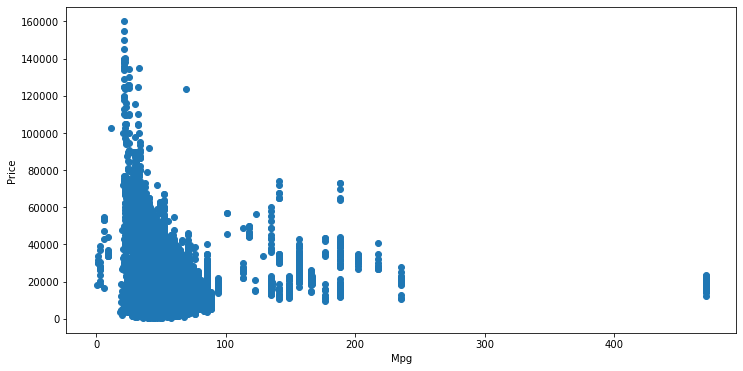

In [673]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['mpg'], df['price'])
ax.set_xlabel('Mpg')
ax.set_ylabel('Price')
plt.show()

In [674]:
outliers_of_mpg = df[df['mpg'] > 400]
outliers_of_mpg

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
25857,BMW,i3,2016.0,17100,Automatic,25269.0,Other,145.0,470.8,0.6
26446,BMW,i3,2017.0,19998,Automatic,41949.0,Hybrid,140.0,470.8,1.6
26603,BMW,i3,2017.0,19998,Automatic,41146.0,Hybrid,145.0,470.8,1.6
26605,BMW,i3,2017.0,21898,Automatic,10839.0,Hybrid,145.0,470.8,1.6
27691,BMW,i3,2017.0,19980,Automatic,26965.0,Hybrid,140.0,470.8,1.6
28177,BMW,i3,2016.0,19490,Automatic,8421.0,Hybrid,145.0,470.8,1.6
29102,BMW,i3,2016.0,16482,Automatic,43695.0,Hybrid,145.0,470.8,1.6
29453,BMW,i3,2015.0,14285,Automatic,65800.0,Hybrid,145.0,470.8,1.6
29738,BMW,i3,2017.0,18500,Automatic,36429.0,Hybrid,145.0,470.8,1.6
29925,BMW,i3,2017.0,19495,Automatic,17338.0,Hybrid,135.0,470.8,1.6


After looking up the mpg of the BMW i3, According to https://en.wikipedia.org/wiki/BMW_i3, I saw that the average mpg is 113. In this case, we can remove these records or fill them with the average mpg-es.

In [677]:
df["mpg"] = df["mpg"].replace(470.8, 113)

##### **4.1.5 Tax**

In [678]:
print(df['tax'].skew())

0.22619513279603462


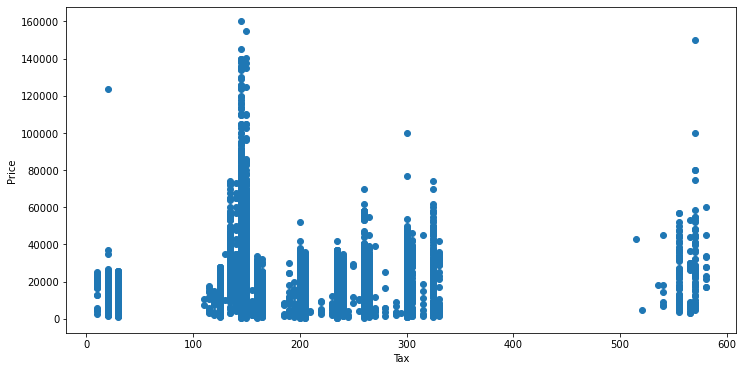

In [679]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['tax'], df['price'])
ax.set_xlabel('Tax')
ax.set_ylabel('Price')
plt.show()

In [680]:
outliers_of_tax = df[df['tax'] > 500]
outliers_of_tax.head(10)

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
372,Audi,RS4,2013.0,26995,Semi-Auto,28359.0,Petrol,565.0,26.4,4.2
1869,Audi,R8,2013.0,47995,Manual,19834.0,Petrol,570.0,19.6,4.2
2091,Audi,RS5,2014.0,23400,Semi-Auto,39210.0,Petrol,555.0,26.9,4.2
3822,Audi,RS4,2014.0,23491,Automatic,61892.0,Petrol,555.0,26.4,4.2
4125,Audi,RS6,2014.0,37000,Automatic,59894.0,Petrol,555.0,28.8,4.0
4442,Audi,RS4,2014.0,26490,Semi-Auto,58460.0,Petrol,555.0,26.4,4.2
4758,Audi,RS4,2014.0,24990,Semi-Auto,70823.0,Petrol,555.0,26.4,4.2
4967,Audi,RS6,2014.0,40990,Automatic,63476.0,Petrol,555.0,28.8,4.0
4976,Audi,R8,2014.0,51990,Semi-Auto,19800.0,Petrol,570.0,22.8,4.2
5054,Audi,R8,2013.0,54850,Semi-Auto,10800.0,Petrol,570.0,22.4,4.2


We can see that these are actually not outliers, because cars that are listed here are defined as race cars. It is normal to have high tax for a car costs  £166,540 which is Audi R8

I will make a copy of the current dataframe for visualization

In [148]:
df_plot = df.copy()
df_copy2 =df.copy()

### **5. Finding Correlations**

#### **5.1 Feature Engineering**

To find correlations, we have to transform the columns that are categorical to numerical values.

In [26]:
df.fuelType.value_counts()

Petrol      49224
Diesel      34068
Hybrid       2065
Other         187
Electric        2
Name: fuelType, dtype: int64

In [27]:
df['fuelType'] = df.fuelType.map({"Petrol": 0, "Diesel": 1, "Hybrid": 2, "Other": 3,"Electric": 4})

In [28]:
df.transmission.value_counts()

Manual       49890
Semi-Auto    19484
Automatic    16165
Other            7
Name: transmission, dtype: int64

In [29]:
df['transmission'] = df.transmission.map({"Manual": 0, "Semi-Auto": 1, "Automatic": 2,"Other": 3})

In [30]:
df.brand.value_counts()

Ford             17085
Volkswagen       14146
Vauxhall         13053
Mercedes-Benz    11032
Audi              9060
BMW               8771
Toyota            6325
Skoda             6074
Name: brand, dtype: int64

In [31]:
df['brand'] = df.brand.map({
    "Ford": 0,
    "Volkswagen": 1,
    "Vauxhall": 2,
    "Mercedes-Benz": 3,
    "Audi": 4,
    "BMW": 5,
    "Toyota": 6,
    "Skoda": 7})

In [32]:
df

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,4,A1,2017,12500,0,15735.0,0,150.0,55.4,1.4
1,4,A6,2016,16500,2,36203.0,1,20.0,64.2,2.0
2,4,A1,2016,11000,0,29946.0,0,30.0,55.4,1.4
3,4,A4,2017,16800,2,25952.0,1,145.0,67.3,2.0
4,4,A3,2019,17300,0,1998.0,0,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
94322,7,Yeti,2014,11440,1,14569.0,0,160.0,44.8,1.2
94323,7,Octavia,2014,10990,1,49999.0,0,30.0,56.5,1.4
94324,7,Fabia,2017,9500,1,17131.0,0,145.0,61.4,1.0
94325,7,Citigo,2016,5999,0,21747.0,0,20.0,62.8,1.0


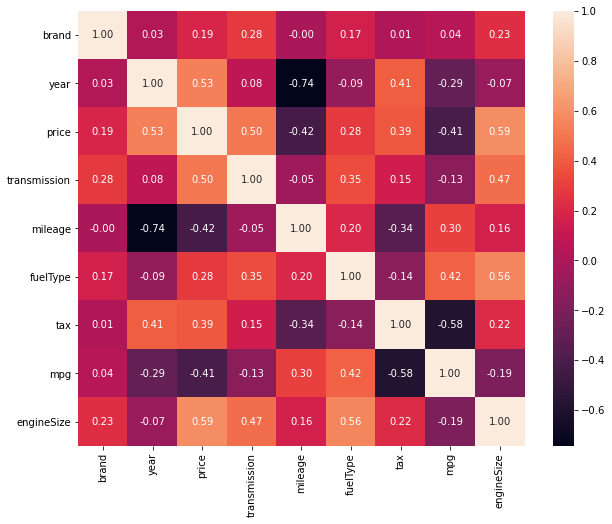

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cbar=True,
    annot=True,fmt='.2f',
  )
plt.show()

In [34]:
corr_matrix = df.corr()
corr_matrix = abs(corr_matrix)
corr_matrix['price'].sort_values(ascending=False)

price           1.000000
engineSize      0.591348
year            0.534888
transmission    0.504850
mileage         0.424349
mpg             0.406875
tax             0.392985
fuelType        0.279899
brand           0.190029
Name: price, dtype: float64

We can clearly see that:
- Engine size has a strong positive correlation with price. This is true, because when the car engize size is higher, it will produce more power. Engine will be more expensive therefore car price will increase. Furthermore, there are also tax regulations when the engine size increases, the applied tax also increases.
- Mileage has a strong negative correlation with price. It is make sense because if the a car has a more mileage, it means that car is more depreciated. Therefore, the price will decrease. On the other hand, new cars has nearly no mileage which are more expensive.
- Year has a strong positive correlation with price. This is same as the mileage, if the car old, it will be more depriciated and have more problems in the future. Also newer cars have lots of new feautres included such as heated seat backs, wireless charging and speed camera detection which will result in an increase in value.
- Transmissions and tax have a good positive correlation with price. Furthermore, Automatic transmission usually more expensive compared to manual. The manual transmission is relatively simple and has not changed much in years. On the other hand, automatic transmissions require more complex engineering in terms of mechanical and electronic standpoint.

Looking the correlations and the graphs, it can be concluded that Engine size, Mileage, Year and Transmissions can be good features to use when building a predictive model.

### **6. Data Visualization**

In this section, I will be visualizing some of the features with price. This will help us to support to conclusions we made in the correlation section.

#### **6.1 Year**

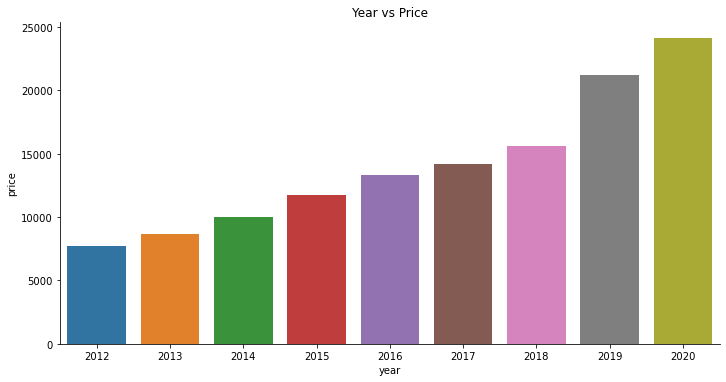

In [35]:
sns.catplot(kind="bar", x="year",y="price", data= df,aspect=2,ci=None)
plt.title('Year vs Price')
plt.show()

It can be seen from the graph that, year has a a linear relationship with price. There is a huge increase in the price after the year 2018. According to https://cardealermagazine.co.uk/publish/used-car-prices-surge-ahead-in-june-recording-largest-growth-since-january-2019/196878 There is a strong pricing trend at the moment driven by the surge in consumer demand to used cars because of the covid-19 and lockdown.

#### **6.2 Tansmissions**

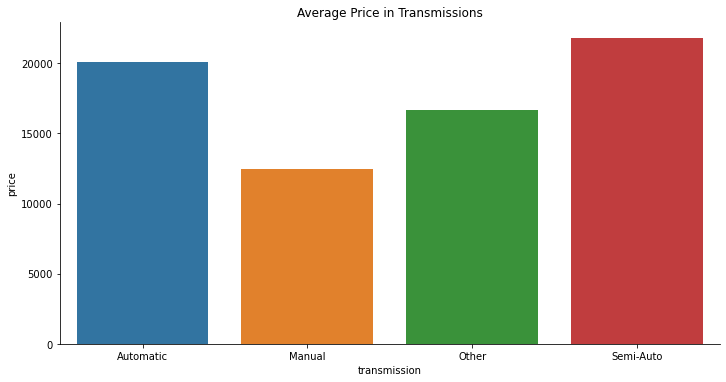

In [36]:
price_by_transmission = df_plot.groupby("transmission")['price'].mean().reset_index()
sns.catplot(kind="bar", x="transmission", y="price", data= price_by_transmission,aspect=2,ci=None)
plt.title('Average Price in Transmissions')
plt.show()

Conventional automatic gearboxes are completely different to manual gearboxes inside, and are much more complex. Therefore, automatic transmission is expensive than manual. According to https://www.moneysupermarket.com/car-insurance/manual-vs-automatic/, automatic cars costs more compared to manuel in terms of insurance. Semi-automatics can be a bit more expensive than manuel and automatic transmission cars, however, it has a lot of benefits, such as ease of use, as you don’t need to switch gears manually unless you want it, as some of the semi-auto cars have steering wheel paddles.

#### **6.3 Fuel Type**

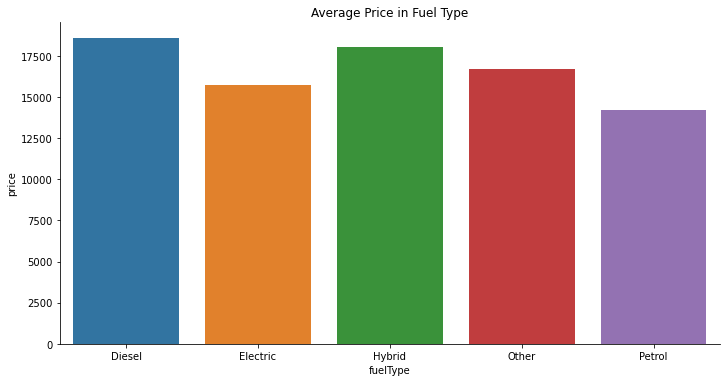

In [37]:
price_by_fuel = df_plot.groupby("fuelType")['price'].mean().reset_index()
sns.catplot(kind="bar", x="fuelType", y="price", data= price_by_fuel,aspect=2,ci=None)
plt.title('Average Price in Fuel Type')
plt.show()

Most of the time a petrol car is cheaper to buy. It is because diesel engines require extra hardware in order to reduce emissions and comply with stricter EU laws. According to https://www.gov.uk/vehicle-tax-rate-tables, Higher rate of payment required for diesel cars that do not meet the Real Driving Emissions. The depreciation value for a hybrid is about the same as most other cars. But, hybrids are more expensive and have the appeal of being fuel efficient, so a used hybrid still sells for a lot. This is great for the seller, not so much for the buyer. Furthermore, it can be seen that electric cars are one of the cheapest vehicles. However, According to https://newmotion.com/en/knowledge-center/news-and-updates/electric-car-cost-vs-fuel-car-cost, this is because of the tax reduction, cheaper fuel costs and subsidies on purchase prices. For example, People in Norway can have benefit from tax savings which results in a lower purchase price by driving Electric cars.

#### **6.4 Brand**

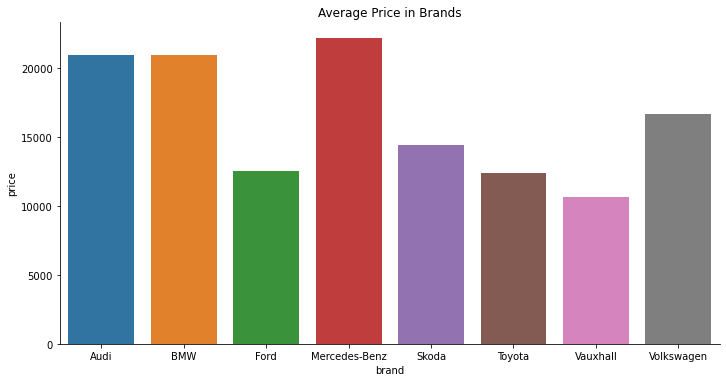

In [38]:
price_by_brand = df_plot.groupby("brand")['price'].mean().reset_index()
sns.catplot(kind="bar", x="brand", y="price", data= price_by_brand,aspect=2,ci=None)
plt.title('Average Price in Brands')
plt.show()


Toyota has one of the cheapest cars in the data. People choose it because of their reliability, quality and fuel efficiency instead of their looks and design. Their car parts also cheaper compared to other brands. Moreover, It can be seen that Mercedes-Benz cars is most expensive listed cars in the data and BMW and Audi are the second most expensive brands.According to https://www.autonews.com/assets/pdf/UCG_AN_Q3WhitePaper_16-NA-1061.pdf, it is because these brands considered luxury and Audi and BMW in good in performance and Mercedes-Benz good in level of workmanship.

#### **6.5 Mileage**

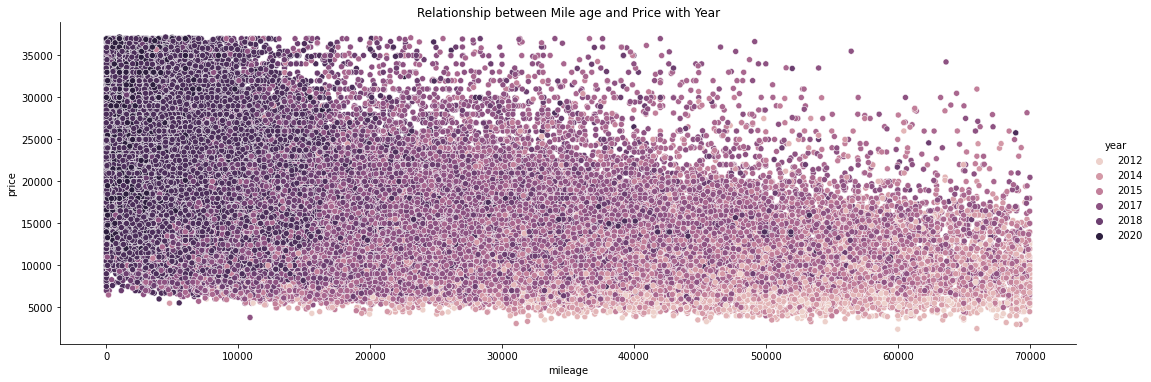

In [39]:
sns.relplot(kind="scatter", x="mileage",y="price", data= df,aspect=3,ci=None,hue="year")
plt.title('Relationship between Mile age and Price with Year')
plt.show()

As the mileage of the car increases, the car will depreciate quickly in value and there can be more issues with the car. Therefore, price will decrease. On the other hand, you can see that cars with less mileage costs more.

#### **6.6 Engine Size**

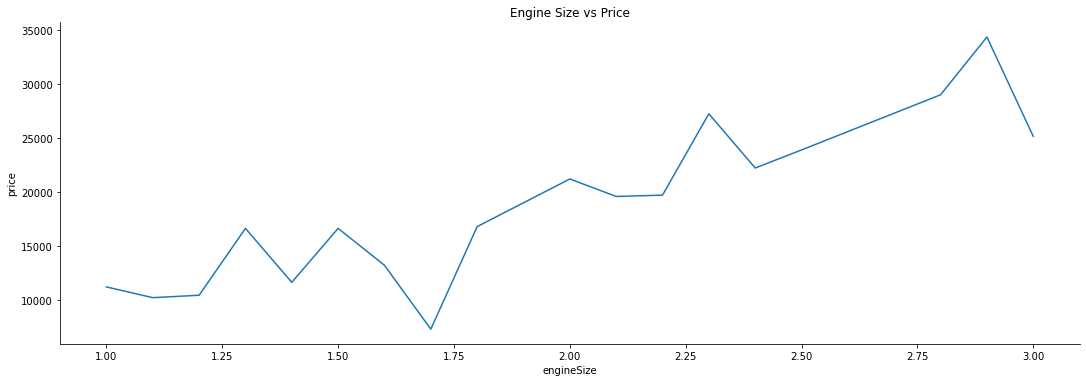

In [40]:
price_by_engine = df_plot.groupby("engineSize")['price'].mean().reset_index()
sns.relplot(kind="line", x="engineSize",y="price", data= price_by_engine,aspect=3,ci=None)
plt.title('Engine Size vs Price')
plt.show()

It can be seen that the the used car price will increase as the engine size increases. A larger engines are more expensive for the manufacturer to build. This cost is usually recovered by increasing the price toward the customer. Moreover, Many cars will have more equipment standard with the larger engine, equipment that would be extra cost when the car is ordered with a smaller engine. The cost of this equipment is added to the base price of the car. There are also tax regulations applied to different engine sizes. Moreover, The larger the engine displacement of an automobile, the higher its fuel consumption and CO2 emission. According to https://www.rac.co.uk/drive/advice/buying-and-selling-guides/car-tax-bands-explained/, since March 2001 tax brackets based on the CO2 emissions of the vehicle which is correlated with engine size.

### **7. Data Storage Solution**

AI and machine learning workloads require enormous amounts of data both to build and train the models and to keep them running. For storage for these workloads, high-performance and long-term data storage are the most important concerns. When examining the storage requirements for AI applications, it's important to note that there's already widespread use of AI within storage platforms themselves. There are some important factors that considered in storage solutions

- Scalability
- Accessibility
- Latency


Storage solution for my AI project can be in cloud and local. Cloud storage has benefits such as ease of accessibility, reduced risk of data loss. On the other hand,  local storage has advantages such as speed, availability. However, if you don't have backup for your data, you can lose your data forever.

When I considered both options and the factors mentioned above, I decided to go with local storage. Mainly because my dataset is not very huge for now. Therefore, it would be easy to store in my local storage. I have M. 2 SSD which super fast when accessing the data. Furthermore, some payment required for the cloud storage solutions. Overall, I will choose local storage for my data storage solution.


#### **7.1 Reproducibility**

I am trying to build a predictive model that estimates the cars prices. These results can be accurate for now. However, it won't make good estimations in 2030 or 2040. Therefore, there should be a mechanism to update our machine learning models. There are two options:
- Manually retraining your model using updated inputs. 
- Building a model designed to learn continuously from new data.

For the manual approach, Alhought, it will be duplication of our training data processes. I will still have the power for shape, change and maybe finding and dealing with abnormalities of the data. On the other hand, continual learning models integrated with new data, often from the production environment in which they have been deployed. I will have less power on operations such as data munging. For example, in terms of Spotify, it is difficult for employees to clean or format the data generated by its millions of users before being fed back into its algorithm. Furthermore, companies like Spotify and Netflix need to perform regular updates for their predictive models in order to attract users.

In my case, I won't need to do regular updates such as daily, weekly, or monthly. It will be suitable to perform update on the predictive model once a year.

In [47]:
final_data = df.to_csv("final_cars_data.csv", index=False)

### **8. Conclusions**

In this notebook, I started with importing the datasets and merging them. After that, I did cleaning the data and getting insights from it. I followed by doing feature engineering and feature selection. This is probably the most important step in a machine learning project as it helps in increasing accuracy, avoiding over-fitting and reduce training time of the model.
I plotted the several graphs to find out the most important features in predicting the used car prices. In the end, I mentioned my approach for data storage solution for my application. Consequently, Engine size, year, tranmissions and mileage are one of the most important features that has an effect on used car prices.